In [ ]:
!pip install --upgrade gensim
import os
os.kill(os.getpid(), 9)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 7.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from gensim.models import Word2Vec

# ЛР 2

In [2]:
!wget https://raw.githubusercontent.com/AI-is-out-there/data2lab/refs/heads/main/модуль%202%20-%20датасет%20-%20практика.csv

--2025-04-13 16:38:10--  https://raw.githubusercontent.com/AI-is-out-there/data2lab/refs/heads/main/%D0%BC%D0%BE%D0%B4%D1%83%D0%BB%D1%8C%202%20-%20%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82%20-%20%D0%BF%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2317929 (2.2M) [text/plain]
Saving to: ‘модуль 2 - датасет - практика.csv’

модуль 2 - датасет  100%[===================>]   2.21M  --.-KB/s    in 0.03s   

2025-04-13 16:38:10 (77.8 MB/s) - ‘модуль 2 - датасет - практика.csv’ saved [2317929/2317929]



In [5]:
# загружаем полный датасет
raw_table_data = pd.read_csv('модуль 2 - датасет - практика.csv')
raw_table_data.head(10)

,subject_id,Count_subj,study_id,cart_id,Healthy_Status,eeg_time,eeg_date,report_0,report_1,report_2,...,filtering,rr_interval,p_onset,p_end,qrs_onset,qrs_end,t_end,p_axis,qrs_axis,t_axis
0,19557662,27,40000017,6848296,0,8:44 AM,27.06.2015,Sinus rhythm,Possible right atrial abnormality,NaN,...,60 Hz notch Baseline filter,659,40,128,170,258,518,81,77,79
1,18477137,93,40000029,6848296,0,9:54 AM,27.06.2015,Sinus rhythm,Possible right atrial abnormality,NaN,...,60 Hz notch Baseline filter,722,40,124,162,246,504,77,75,70
2,16598616,3,40000035,6376932,1,9:07 AM,28.06.2015,Sinus tachycardia,NaN,Normal ECG except for rate,...,60 Hz notch Baseline filter,600,40,130,162,244,474,79,72,77
3,16368287,7,40000079,6214760,1,5:14 PM,15.07.2015,Sinus rhythm,NaN,Normal ECG,...,60 Hz notch Baseline filter,659,40,146,180,254,538,79,66,69
4,18370366,2,40000084,6632385,0,1:52 PM,27.09.2015,Sinus rhythm,NaN,NaN,...,<not specified>,659,368,29999,504,590,868,84,80,77
5,15606157,55,40000089,6632385,0,2:29 PM,29.10.2013,Sinus rhythm,NaN,NaN,...,<not specified>,822,365,29999,499,592,852,26,46,30
6,12576058,43,40000115,6852956,1,12:54 PM,23.03.2016,Sinus rhythm,NaN,Normal ECG,...,60 Hz notch Baseline filter,952,40,146,198,282,598,24,80,20
7,14691089,1,40000143,6551957,0,10:01 AM,10.12.2016,Sinus rhythm,rSr'(V1) - probable normal variant,Low QRS voltages in precordial leads,...,60 Hz notch Baseline filter,923,40,140,188,278,594,26,86,13
8,14144725,7,40000144,6924910,0,7:24 AM,11.12.2011,Sinus rhythm with PAC(s).,NaN,Borderline ECG,...,60 Hz notch Baseline filter,952,40,180,196,294,610,59,-17,3
9,16089780,2,40000152,6919786,0,12:35 PM,13.12.2011,Sinus rhythm,Extensive T wave changes may be due to myocard...,NaN,...,60 Hz notch Baseline filter,1000,40,156,178,274,584,8,-11,19


Сначала нужно объединить текстовые отчёты и перевести их в числовой признак

In [6]:
# Предобрабатываем данные словестных репортов word2vec в числовой вектор
full_df_filtered = raw_table_data.copy()

# Слепляем все текстовые отчеты в один большой
reports = [f'report_{x}' for x in range(18)]
full_df_filtered['report_0'] = full_df_filtered[reports].astype(str).agg(' '.join, axis=1)
full_df_filtered['report_0'] = full_df_filtered['report_0'].str.replace(r'\bnan\b', '', regex=True).str.replace(r'\s+', ' ', regex=True).str.strip()
full_df_filtered.rename(columns={'report_0': 'report'}, inplace=True)
reports_to_drop = [f'report_{x}' for x in range(1, 18)]
full_df_filtered = full_df_filtered.drop(reports_to_drop, axis=1)

# Фиксим имена столбцов
full_df_filtered = full_df_filtered.rename(columns={'eeg_time ': 'eeg_time', 'eeg_date ': 'eeg_date'})
full_df_filtered = full_df_filtered.drop(columns = ['bandwidth', 'filtering'])

# Делаем колонку с таргетами крайней справа
full_df_filtered = full_df_filtered[[col for col in full_df_filtered.columns if col != 'Healthy_Status'] + ['Healthy_Status']]

# Разбиваем столбец с текстовым отчетом на токены
words = [text.split() for text in full_df_filtered['report']]

# Обучаем модель Word2Vec
w2v_model = Word2Vec(words)

# Функция для получения среднего эмбеддинга строки
def get_sentence_embedding(sentence):
    words = sentence.split()
    word_vectors = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if word_vectors:
        return np.mean(word_vectors, axis=0)  # Усреднённый вектор
    else:
        return np.zeros(w2v_model.vector_size)  # Нулевой вектор, если слова нет в модели

# Применяем функцию ко всей колонке и переводим каждый вектор в одно число
full_df_filtered['report'] = full_df_filtered['report'].apply(lambda x: get_sentence_embedding(x).mean())

full_df_filtered.head()

,subject_id,Count_subj,study_id,cart_id,eeg_time,eeg_date,report,rr_interval,p_onset,p_end,qrs_onset,qrs_end,t_end,p_axis,qrs_axis,t_axis,Healthy_Status
0,19557662,27,40000017,6848296,8:44 AM,27.06.2015,-0.001787,659,40,128,170,258,518,81,77,79,0
1,18477137,93,40000029,6848296,9:54 AM,27.06.2015,-0.001787,722,40,124,162,246,504,77,75,70,0
2,16598616,3,40000035,6376932,9:07 AM,28.06.2015,-0.026241,600,40,130,162,244,474,79,72,77,1
3,16368287,7,40000079,6214760,5:14 PM,15.07.2015,-0.010260,659,40,146,180,254,538,79,66,69,1
4,18370366,2,40000084,6632385,1:52 PM,27.09.2015,-0.034584,659,368,29999,504,590,868,84,80,77,0


Удалим ненужные столбцы

In [7]:
# make new dataset from old columns
table_data = full_df_filtered[['report','rr_interval','p_onset','p_end', 'qrs_onset','qrs_end','t_end','p_axis','qrs_axis','t_axis','Healthy_Status']].copy()
table_data.head()

,report,rr_interval,p_onset,p_end,qrs_onset,qrs_end,t_end,p_axis,qrs_axis,t_axis,Healthy_Status
0,-0.001787,659,40,128,170,258,518,81,77,79,0
1,-0.001787,722,40,124,162,246,504,77,75,70,0
2,-0.026241,600,40,130,162,244,474,79,72,77,1
3,-0.010260,659,40,146,180,254,538,79,66,69,1
4,-0.034584,659,368,29999,504,590,868,84,80,77,0


Нарисуем боксплот с необработанными данными

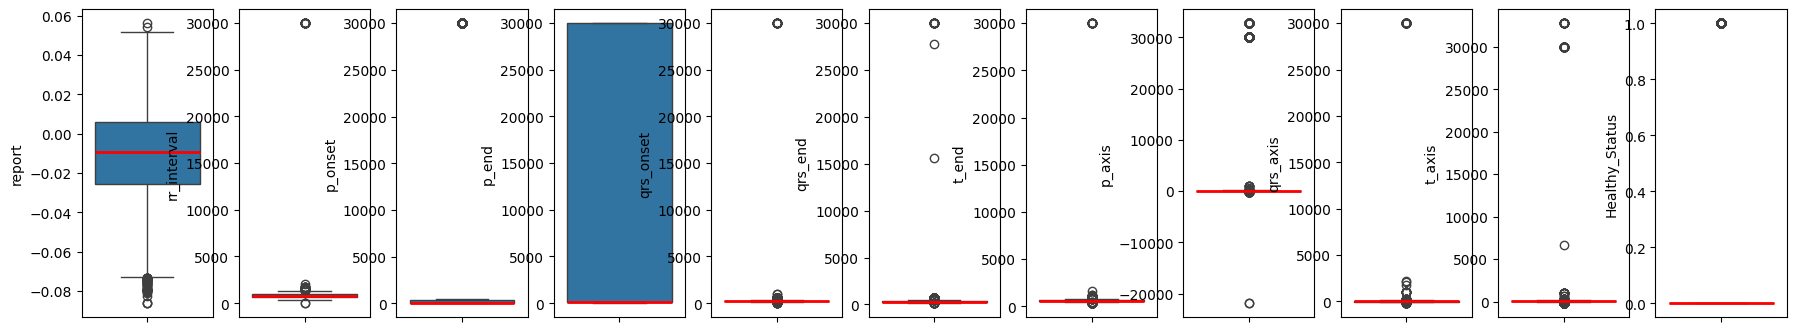

In [6]:
n = table_data.shape[1]
fig,ax = plt.subplots(1,n, figsize=(n*2,4), sharex=True)
for i in range(n):
    plt.sca(ax[i])
    col = table_data.columns[i]
    sns.boxplot(y = table_data.iloc[:,i],data=table_data, medianprops={"color": "r", "linewidth": 2})

Очищаем лишнее и фильтруем данные

In [8]:
# Убираем выбросы
columns_to_filter = ['rr_interval', 'p_onset','p_end', 'qrs_onset', 'qrs_end', 't_end', 'p_axis', 'qrs_axis', 't_axis']
table_data = table_data[(table_data[columns_to_filter] < 2000).all(axis=1)]
table_data = table_data[(table_data['p_onset'] < table_data['p_end']) & (table_data['qrs_onset'] < table_data['qrs_end'])]

In [9]:
# удаляем аномалии из данных (убрать все значения более 5000)
for i, v in enumerate(table_data):
  table_data = table_data.drop(table_data[table_data.iloc[:,i] > 10000].index)

In [10]:
# Удаляем столбец p_onset - он неинформативный
table_data = table_data[['report','rr_interval','p_end', 'qrs_onset','qrs_end','t_end','p_axis','qrs_axis','t_axis','Healthy_Status']].copy()
table_data.head()

,report,rr_interval,p_end,qrs_onset,qrs_end,t_end,p_axis,qrs_axis,t_axis,Healthy_Status
0,-0.001787,659,128,170,258,518,81,77,79,0
1,-0.001787,722,124,162,246,504,77,75,70,0
2,-0.026241,600,130,162,244,474,79,72,77,1
3,-0.010260,659,146,180,254,538,79,66,69,1
6,-0.010260,952,146,198,282,598,24,80,20,1


Построим после фильтрации

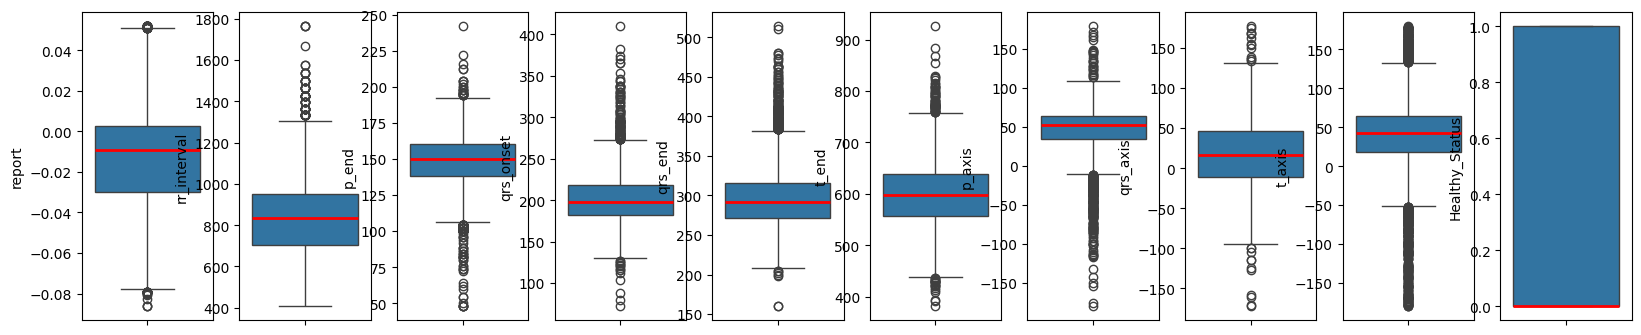

In [11]:
n = table_data.shape[1]
fig,ax = plt.subplots(1,n, figsize=(n*2,4), sharex=True)
for i in range(n):
    plt.sca(ax[i])
    col = table_data.columns[i]
    sns.boxplot(y = table_data.iloc[:,i],data=table_data, medianprops={"color": "r", "linewidth": 2})

После очистки аномальных данных стало лучше

Оценим взаимосвязь по HeatMap

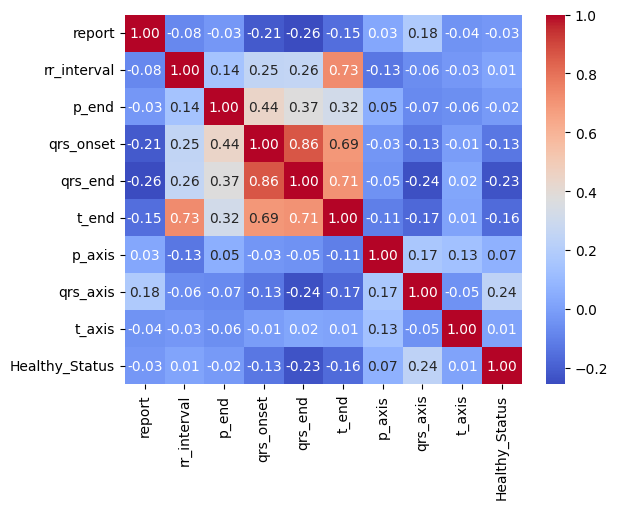

In [12]:
sns.heatmap(table_data.corr(),annot=True,fmt="0.2f",cmap="coolwarm")
plt.show()

Healthy_Status имеет достаточно слабую взаимосвязь с признаками по отдельности

Теперь построим PairPlot

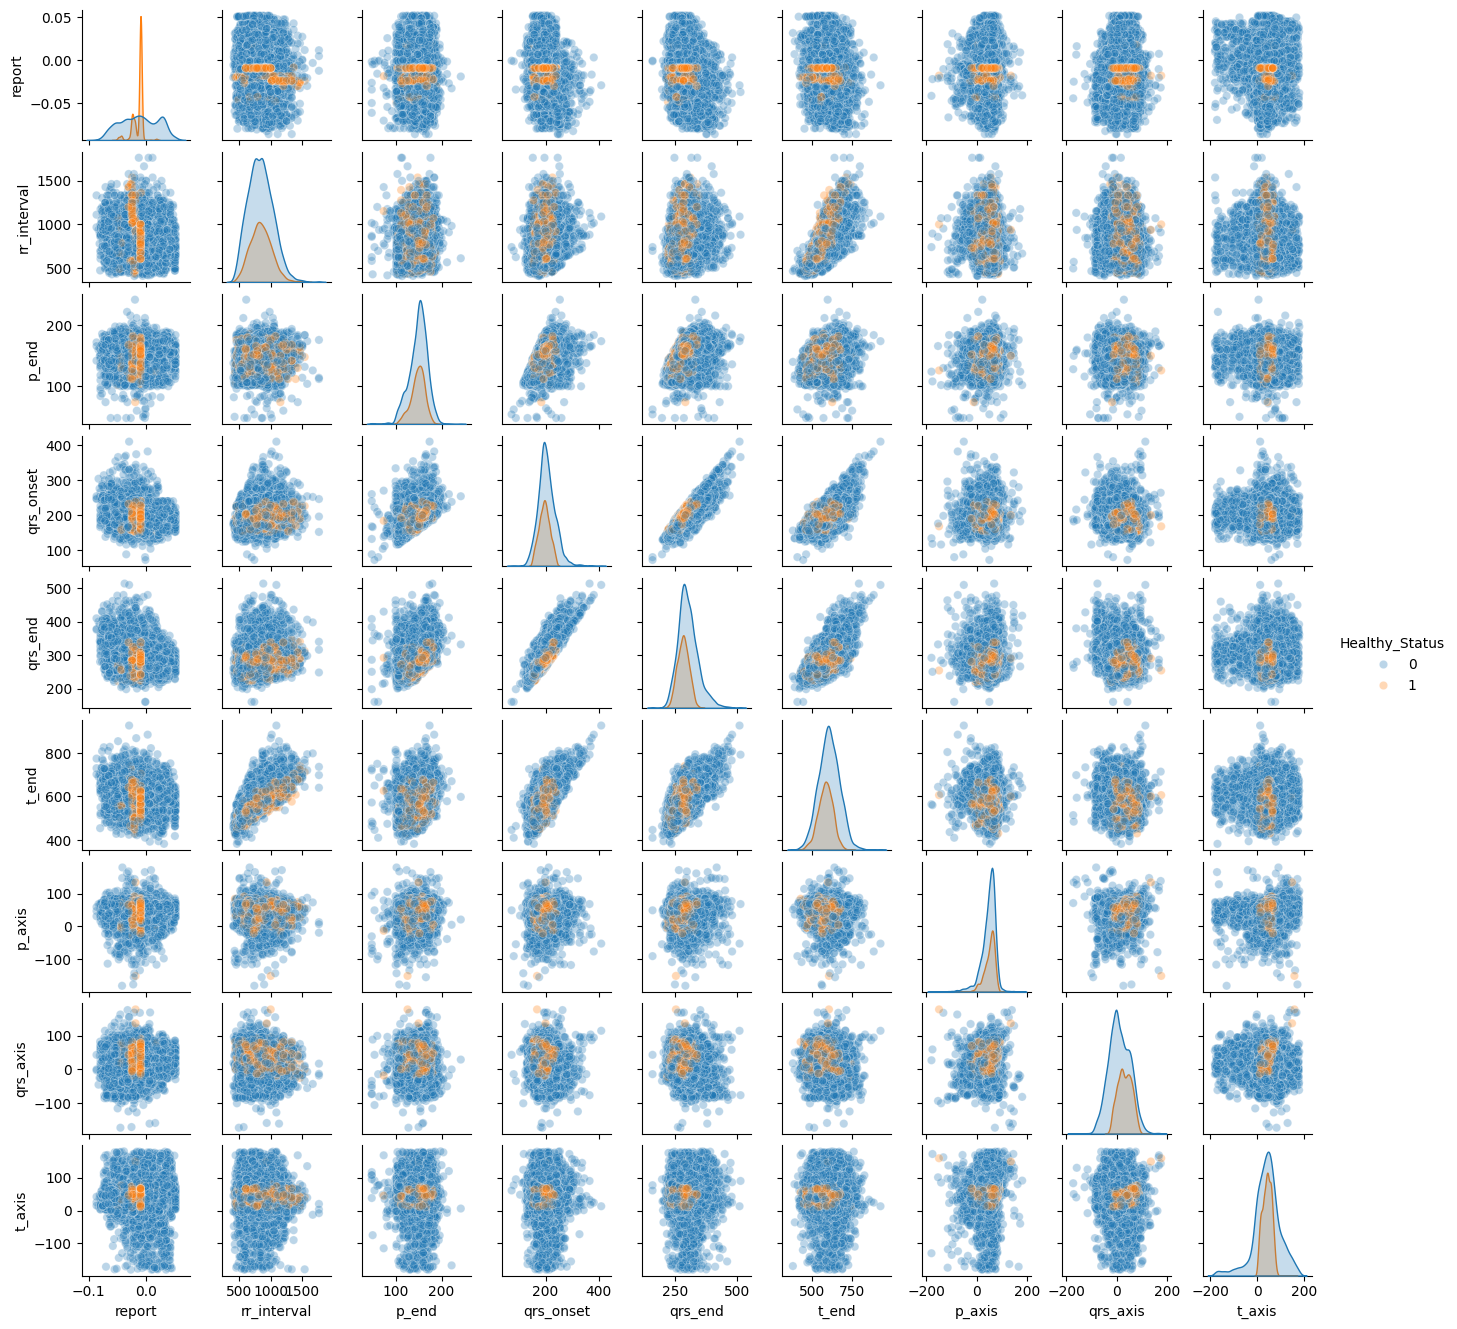

In [13]:
sns.pairplot(table_data, hue = "Healthy_Status",
             height=1.5,
             plot_kws=dict(alpha=0.3))

Можно заметить тенденцию, что для условно-здоровых значения сосредоточены в определённой окрестиности, когда как у пациентов разбров намного больше

## PCA-анализ

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [15]:
table_data_pca = table_data
table_data_pca = table_data_pca.drop('Healthy_Status', axis = 1)
table_data_pca.columns

Index(['report', 'rr_interval', 'p_end', 'qrs_onset', 'qrs_end', 't_end',
       'p_axis', 'qrs_axis', 't_axis'],
      dtype='object')

In [16]:
# Before applying PCA, each feature should be centered (zero mean) and with unit variance
scaled_data = StandardScaler().fit(table_data_pca).transform(table_data_pca)
pca = PCA(n_components = 2).fit(scaled_data)
x_pca = pca.transform(scaled_data)
print(table_data.shape, x_pca.shape)

(7046, 10) (7046, 2)


In [17]:
percent = pca.explained_variance_ratio_
print(percent)
print(sum(percent))

[0.34916608 0.13427677]
0.48344284442326246


Рисуем для 2-х компонент

Text(0, 0.5, 'Second Principal Component')

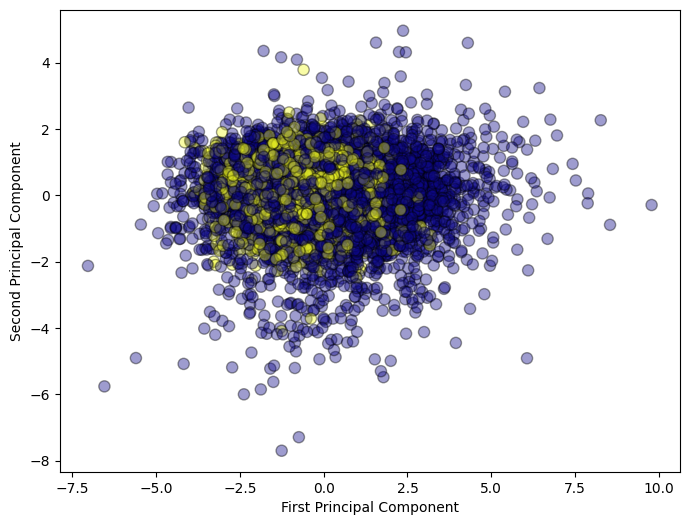

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=table_data['Healthy_Status'], cmap='plasma', alpha=0.4, edgecolors='black', s=65);
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

<ipython-input-19-99fc634eb334>:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.arrow(0, 0, components['PCA1'][a], -components['PCA2'][a], alpha=0.5, facecolor='white', head_width=.01)
<ipython-input-19-99fc634eb334>:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.annotate(i, (components['PCA1'][a]*offset, -components['PCA2'][a]*offset), color='orange')


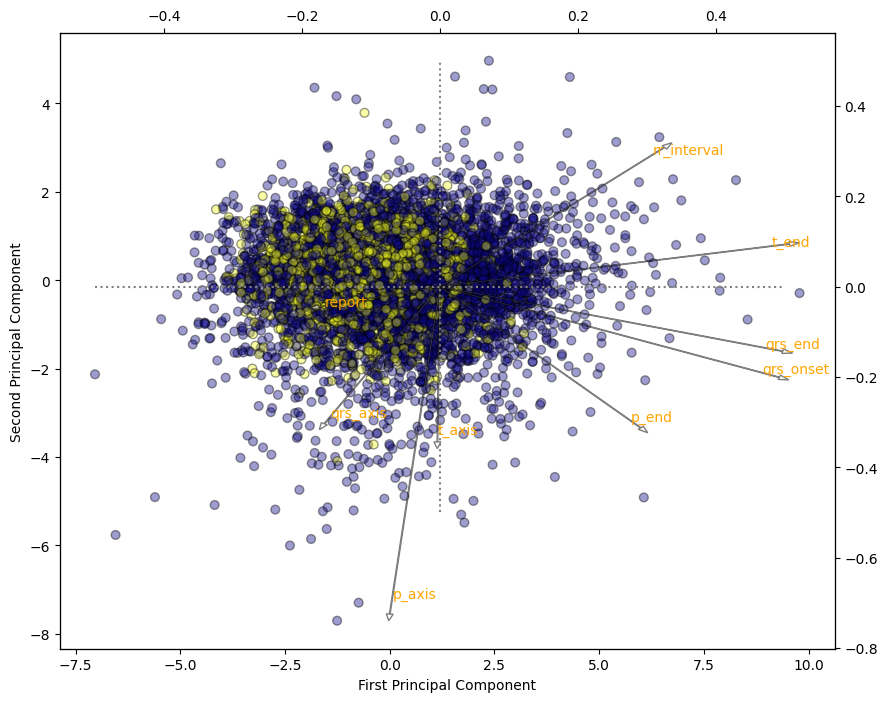

In [19]:
# put feature values into dataframe
components = pd.DataFrame(pca.components_.T, index=table_data_pca.columns, columns= ['PCA1','PCA2'])
# plot size
plt.figure(figsize=(10,8))
# main scatterplot
plt.scatter(x_pca[:,0], x_pca[:,1], c=table_data['Healthy_Status'],
            cmap='plasma', alpha=0.4, edgecolors='black', s=40);
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
#plt.ylim(15,-15);
#plt.xlim(20,-20);

# individual feature values
ax2 = plt.twinx().twiny();
#ax2.set_ylim(-0.5,0.5);
#ax2.set_xlim(-0.5,0.5);

# reference lines
ax2.hlines(0,-0.5,0.5, linestyles='dotted', colors='grey')
ax2.vlines(0,-0.5,0.5, linestyles='dotted', colors='grey')

# offset for labels
offset = 0.95
# arrow & text
for a, i in enumerate(components.index):
  ax2.arrow(0, 0, components['PCA1'][a], -components['PCA2'][a], alpha=0.5, facecolor='white', head_width=.01)
  ax2.annotate(i, (components['PCA1'][a]*offset, -components['PCA2'][a]*offset), color='orange')

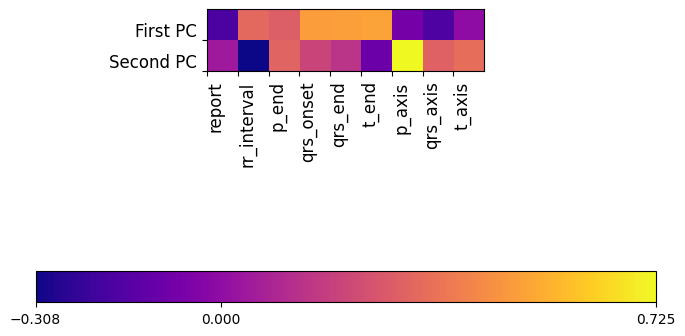

In [20]:
fig = plt.figure(figsize=(8, 4))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
feature_names = list(table_data_pca.columns)
plt.gca().set_xticks(np.arange(-.5, len(feature_names)-1));
plt.gca().set_yticks(np.arange(0.5, 2));
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left',fontsize=12);
plt.gca().set_yticklabels(['First PC', 'Second PC'], va='bottom',fontsize=12);
plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0,
                                              pca.components_.max()],pad=0.65);

## t-SNE

Text(0, 0.5, 'Second Principal Component')

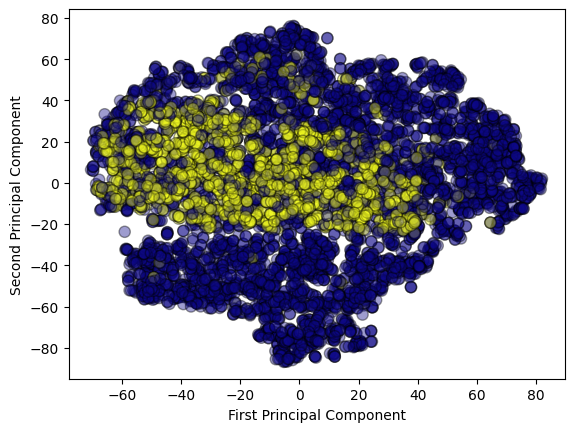

In [21]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state = 0)
scaled_data_tsne = tsne.fit_transform(scaled_data)
plt.scatter(scaled_data_tsne[:,0], scaled_data_tsne[:,1], c=table_data['Healthy_Status'], cmap='plasma', alpha=0.4, edgecolors='black', s=65);
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [22]:
from sklearn import manifold
from time import time

Time code evaluation for perplexity=1 in 23 sec
Time code evaluation for perplexity=5 in 31 sec
Time code evaluation for perplexity=10 in 30 sec
Time code evaluation for perplexity=15 in 33 sec
Time code evaluation for perplexity=20 in 32 sec
Time code evaluation for perplexity=30 in 36 sec
Time code evaluation for perplexity=40 in 37 sec
Time code evaluation for perplexity=50 in 29 sec
Time code evaluation for perplexity=100 in 36 sec


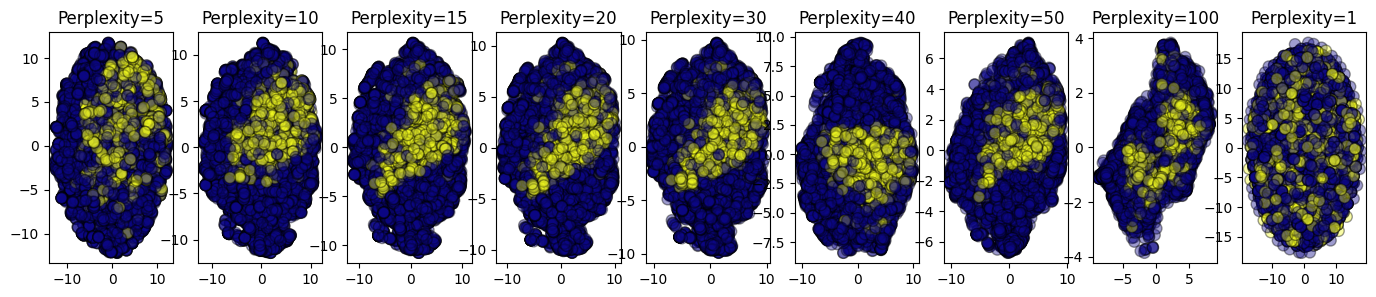

In [23]:
n_components = 2
perplexities = [1, 5, 10, 15, 20, 30, 40, 50, 100]
#perplexities = [5, 10]

(fig, subplots) = plt.subplots(1, len(perplexities), figsize=(17, 3))

for i, perplexity in enumerate(perplexities):
    ax = subplots[i-1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        max_iter=300,
        )

    scaled_data_tsne = tsne.fit_transform(scaled_data)
    t1 = time()

    print("Time code evaluation for perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(scaled_data_tsne[:,0], scaled_data_tsne[:,1],
               c=table_data['Healthy_Status'],
               cmap='plasma',
               alpha=0.4,
               edgecolors='black',
               s=65
               );
    ax.axis("tight")


# ЛР3

## FEDOT

In [24]:
!pip install -U fedot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 27.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.2/416.2 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.2/296.2 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.0/394.0 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [9]:
table_data.head()

,report,rr_interval,p_end,qrs_onset,qrs_end,t_end,p_axis,qrs_axis,t_axis,Healthy_Status
0,0.015563,659,128,170,258,518,81,77,79,0
1,0.015563,722,124,162,246,504,77,75,70,0
2,-0.029635,600,130,162,244,474,79,72,77,1
3,-0.011826,659,146,180,254,538,79,66,69,1
6,-0.011826,952,146,198,282,598,24,80,20,1


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from fedot.api.main import Fedot
from fedot.core.repository.tasks import Task, TaskTypesEnum
from sklearn.metrics import accuracy_score, classification_report


# Разбиваем данные на признаки и целевой признак
X = table_data.drop('Healthy_Status', axis=1)
y = table_data['Healthy_Status']

# Выполняем разбиение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Задаём тип задачи – классификация

# Создаём экземпляр Fedot для решения задачи классификации
model = Fedot(problem='classification', timeout=5, preset='best_quality')

# Обучаем модель
model.fit(features=X_train, target=y_train)

# Получаем предсказания на тестовой выборке
predictions = model.predict(X_test)

# Оценка
print(f"\nAccuracy: {accuracy_score(y_test, predictions):.4f}")
print("\nClassification Report:\n", classification_report(y_test, predictions))


Level 100:root:Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'


2025-04-13 17:48:54,851 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'


Level 45:root:ApiComposer - Initial pipeline was fitted in 5.3 sec.


2025-04-13 17:49:00,250 - ApiComposer - Initial pipeline was fitted in 5.3 sec.


Level 45:root:ApiComposer - Taking into account n_folds=5, estimated fit time for initial assumption is 26.6 sec.


2025-04-13 17:49:00,262 - ApiComposer - Taking into account n_folds=5, estimated fit time for initial assumption is 26.6 sec.


Level 45:root:ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 5 min. Set of candidate models: ['bernb', 'catboost', 'dt', 'fast_ica', 'isolation_forest_class', 'knn', 'lgbm', 'logit', 'mlp', 'normalization', 'pca', 'poly_features', 'qda', 'resample', 'rf', 'scaling', 'xgboost'].


2025-04-13 17:49:00,295 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 5 min. Set of candidate models: ['bernb', 'catboost', 'dt', 'fast_ica', 'isolation_forest_class', 'knn', 'lgbm', 'logit', 'mlp', 'normalization', 'pca', 'poly_features', 'qda', 'resample', 'rf', 'scaling', 'xgboost'].


Level 45:root:ApiComposer - Timeout is too small for composing and is skipped because fit_time is 26.604715 sec.


2025-04-13 17:49:00,615 - ApiComposer - Timeout is too small for composing and is skipped because fit_time is 26.604715 sec.


Level 45:root:ApiComposer - Hyperparameters tuning started with 5 min. timeout


2025-04-13 17:49:00,782 - ApiComposer - Hyperparameters tuning started with 5 min. timeout


Level 45:root:SimultaneousTuner - Initial graph: {'depth': 3, 'length': 5, 'nodes': [logit, catboost, scaling, xgboost, lgbm]}
logit - {}
catboost - {'n_jobs': 2, 'num_trees': 3000, 'learning_rate': 0.03, 'l2_leaf_reg': 0.01, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 5, 'min_data_in_leaf': 1, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': False, 'allow_writing_files': False, 'use_eval_set': True, 'use_best_model': True, 'enable_categorical': True}
scaling - {}
xgboost - {'n_jobs': 2, 'verbosity': 0, 'booster': 'gbtree', 'tree_method': 'auto', 'enable_categorical': True, 'use_eval_set': True, 'early_stopping_rounds': 30}
lgbm - {'boosting_type': 'gbdt', 'max_depth': -1, 'bagging_fraction': 0.85, 'extra_trees': False, 'enable_categorical': True, 'use_eval_set': True, 'early_stopping_rounds': 30, 'n_jobs': 

2025-04-13 17:49:22,356 - SimultaneousTuner - Initial graph: {'depth': 3, 'length': 5, 'nodes': [logit, catboost, scaling, xgboost, lgbm]}
logit - {}
catboost - {'n_jobs': 2, 'num_trees': 3000, 'learning_rate': 0.03, 'l2_leaf_reg': 0.01, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 5, 'min_data_in_leaf': 1, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': False, 'allow_writing_files': False, 'use_eval_set': True, 'use_best_model': True, 'enable_categorical': True}
scaling - {}
xgboost - {'n_jobs': 2, 'verbosity': 0, 'booster': 'gbtree', 'tree_method': 'auto', 'enable_categorical': True, 'use_eval_set': True, 'early_stopping_rounds': 30}
lgbm - {'boosting_type': 'gbdt', 'max_depth': -1, 'bagging_fraction': 0.85, 'extra_trees': False, 'enable_categorical': True, 'use_eval_set': True, 'early_stopping_rounds': 30

Level 45:root:SimultaneousTuner - Final graph: {'depth': 3, 'length': 5, 'nodes': [logit, catboost, scaling, xgboost, lgbm]}
logit - {}
catboost - {'n_jobs': 2, 'num_trees': 3000, 'learning_rate': 0.03, 'l2_leaf_reg': 0.01, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 5, 'min_data_in_leaf': 1, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': False, 'allow_writing_files': False, 'use_eval_set': True, 'use_best_model': True, 'enable_categorical': True}
scaling - {}
xgboost - {'n_jobs': 2, 'verbosity': 0, 'booster': 'gbtree', 'tree_method': 'auto', 'enable_categorical': True, 'use_eval_set': True, 'early_stopping_rounds': 30}
lgbm - {'boosting_type': 'gbdt', 'max_depth': -1, 'bagging_fraction': 0.85, 'extra_trees': False, 'enable_categorical': True, 'use_eval_set': True, 'early_stopping_rounds': 30, 'n_jobs': 2,

2025-04-13 17:53:55,843 - SimultaneousTuner - Final graph: {'depth': 3, 'length': 5, 'nodes': [logit, catboost, scaling, xgboost, lgbm]}
logit - {}
catboost - {'n_jobs': 2, 'num_trees': 3000, 'learning_rate': 0.03, 'l2_leaf_reg': 0.01, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 5, 'min_data_in_leaf': 1, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': False, 'allow_writing_files': False, 'use_eval_set': True, 'use_best_model': True, 'enable_categorical': True}
scaling - {}
xgboost - {'n_jobs': 2, 'verbosity': 0, 'booster': 'gbtree', 'tree_method': 'auto', 'enable_categorical': True, 'use_eval_set': True, 'early_stopping_rounds': 30}
lgbm - {'boosting_type': 'gbdt', 'max_depth': -1, 'bagging_fraction': 0.85, 'extra_trees': False, 'enable_categorical': True, 'use_eval_set': True, 'early_stopping_rounds': 30, 

Level 45:root:SimultaneousTuner - Final metric: 0.990


2025-04-13 17:53:55,857 - SimultaneousTuner - Final metric: 0.990


Level 45:root:ApiComposer - Hyperparameters tuning finished


2025-04-13 17:53:55,881 - ApiComposer - Hyperparameters tuning finished


Level 45:root:ApiComposer - Model generation finished


2025-04-13 17:53:56,463 - ApiComposer - Model generation finished


Level 45:root:FEDOT logger - Final pipeline was fitted


2025-04-13 17:53:59,911 - FEDOT logger - Final pipeline was fitted


Level 45:root:FEDOT logger - Final pipeline: {'depth': 3, 'length': 5, 'nodes': [logit, catboost, scaling, xgboost, lgbm]}
logit - {}
catboost - {'n_jobs': 2, 'num_trees': 3000, 'learning_rate': 0.03, 'l2_leaf_reg': 0.01, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 5, 'min_data_in_leaf': 1, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': False, 'allow_writing_files': False, 'use_eval_set': True, 'use_best_model': True, 'enable_categorical': True}
scaling - {}
xgboost - {'n_jobs': 2, 'verbosity': 0, 'booster': 'gbtree', 'tree_method': 'auto', 'enable_categorical': True, 'use_eval_set': True, 'early_stopping_rounds': 30}
lgbm - {'boosting_type': 'gbdt', 'max_depth': -1, 'bagging_fraction': 0.85, 'extra_trees': False, 'enable_categorical': True, 'use_eval_set': True, 'early_stopping_rounds': 30, 'n_jobs': 2, '

2025-04-13 17:53:59,917 - FEDOT logger - Final pipeline: {'depth': 3, 'length': 5, 'nodes': [logit, catboost, scaling, xgboost, lgbm]}
logit - {}
catboost - {'n_jobs': 2, 'num_trees': 3000, 'learning_rate': 0.03, 'l2_leaf_reg': 0.01, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 5, 'min_data_in_leaf': 1, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': False, 'allow_writing_files': False, 'use_eval_set': True, 'use_best_model': True, 'enable_categorical': True}
scaling - {}
xgboost - {'n_jobs': 2, 'verbosity': 0, 'booster': 'gbtree', 'tree_method': 'auto', 'enable_categorical': True, 'use_eval_set': True, 'early_stopping_rounds': 30}
lgbm - {'boosting_type': 'gbdt', 'max_depth': -1, 'bagging_fraction': 0.85, 'extra_trees': False, 'enable_categorical': True, 'use_eval_set': True, 'early_stopping_rounds': 30, 'n

In [19]:
# Импортируем необходимые библиотеки
import pandas as pd
from fedot.core.pipelines.pipeline import Pipeline

pipeline = model.current_pipeline

path_to_save = 'model.json'

pipeline.save(path=path_to_save, is_datetime_in_path=False)

('{\n    "total_pipeline_operations": [\n        "scaling",\n        "catboost",\n        "xgboost",\n        "lgbm",\n        "logit"\n    ],\n    "depth": 3,\n    "nodes": [\n        {\n            "operation_id": 2,\n            "operation_type": "scaling",\n            "operation_name": "ScalingImplementation",\n            "custom_params": {},\n            "params": {},\n            "nodes_from": [],\n            "fitted_operation_path": [\n                "fitted_operations",\n                "operation_2.pkl"\n            ],\n            "rating": null\n        },\n        {\n            "operation_id": 1,\n            "operation_type": "catboost",\n            "operation_name": "FedotCatBoostClassificationImplementation",\n            "custom_params": {\n                "n_jobs": 2,\n                "num_trees": 3000,\n                "learning_rate": 0.03,\n                "l2_leaf_reg": 0.01,\n                "bootstrap_type": "Bernoulli",\n                "grow_policy": "Sym

## LAMA

In [13]:
!pip install -U lightautoml

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.0/399.0 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.0/216.0 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.5/309.5 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task


# Разбиваем данные на обучающую и тестовую выборки
train_df, test_df = train_test_split(table_data, test_size=0.3, random_state=42)

# Создаём модель LightAutoML (TabularAutoML) для задачи бинарной классификации
# Параметр timeout задаёт максимальное время поиска модели (в секундах)
automl = TabularAutoML(task=Task('binary'), timeout=30)

# Обучаем модель. В качестве roles можно указать имя целевой переменной ('target')
oof_pred = automl.fit_predict(train_df, roles={'target': 'Healthy_Status'})

# Выполняем предсказание на тестовой выборке
pred_test = automl.predict(test_df)

# Получаем предсказанные вероятности. Преобразуем их в бинарные классы с порогом 0.5
y_pred = (pred_test.data[:, 0] > 0.5).astype(int)

# Выводим отчёт классификации
report = classification_report(test_df['Healthy_Status'], y_pred)
print(report)


INFO:lightautoml.automl.presets.base:Stdout logging level is ERROR.
INFO:lightautoml.automl.presets.base:Task: binary

INFO:lightautoml.automl.presets.base:Start automl preset with listed constraints:
INFO:lightautoml.automl.presets.base:- time: 30.00 seconds
INFO:lightautoml.automl.presets.base:- CPU: 4 cores
INFO:lightautoml.automl.presets.base:- memory: 16 GB

INFO:lightautoml.reader.base:Train data shape: (4932, 10)

INFO3:lightautoml.reader.base:Feats was rejected during automatic roles guess: []
INFO:lightautoml.automl.base:Layer 1 train process start. Time left 7.63 secs
INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
DEBUG:lightautoml.ml_algo.base:Training params: {'tol': 1e-06, 'max_iter': 100, 'cs': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000], 'early_stopping': 2, 'categorical_idx': [0], 'embed_sizes': array([11], dtype=int32), 'data_size': 13}
INFO2:lightautoml.ml_alg

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1497
           1       1.00      0.88      0.94       617

    accuracy                           0.97      2114
   macro avg       0.98      0.94      0.96      2114
weighted avg       0.97      0.97      0.97      2114



## H2O

In [15]:
!pip install -U h2o

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 MB 1.7 MB/s eta 0:00:00


In [16]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd
from sklearn.metrics import classification_report

# Инициализируем кластер H2O
h2o.init()

# Конвертируем Pandas DataFrame в H2OFrame
hf = h2o.H2OFrame(table_data)

# Для бинарной классификации целевой признак нужно привести к категориальному типу
hf['Healthy_Status'] = hf['Healthy_Status'].asfactor()

# Разбиваем данные на обучающую и тестовую выборки
train, test = hf.split_frame(ratios=[0.7], seed=42)

# Определяем список признаков и целевую переменную
target = 'Healthy_Status'
features = [col for col in hf.col_names if col != target]

# Создаём и обучаем модель H2O AutoML
aml = H2OAutoML(max_runtime_secs=30, seed=42, project_name="h2o_automl_example")
aml.train(x=features, y=target, training_frame=train)

# Выводим таблицу лидеров
lb = aml.leaderboard
print(lb)

# Получаем предсказания на тестовой выборке
predictions = aml.leader.predict(test)

# Преобразуем предсказания и истинные значения в Pandas DataFrame для расчёта метрик
pred_df = predictions.as_data_frame()
true_df = test[target].as_data_frame()

# Извлекаем предсказанные классы и истинные метки
# H2O возвращает предсказания в столбце 'predict'
y_pred = pred_df['predict'].astype(int)
y_true = true_df[target].astype(int)

# Выводим отчёт классификации (precision, recall, f1-score и support)
report = classification_report(y_true, y_pred)
print(report)

# По окончании работы можно остановить кластер H2O
h2o.shutdown(prompt=False)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.26" 2025-01-21; OpenJDK Runtime Environment (build 11.0.26+4-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.26+4-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.11/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp72jfycxp
  JVM stdout: /tmp/tmp72jfycxp/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp72jfycxp/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,09 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_unknownUser_sx8cd9
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse        mse
StackedEnsemble_BestOfFamily_1_AutoML_1_20250413_173247  0.984767   0.124668  0.975616               0.0584397  0.183197  0.0335611
GBM_1_AutoML_1_20250413_173247                           0.984609   0.230226  0.975485               0.057393   0.243543  0.059313
XGBoost_1_AutoML_1_20250413_173247                       0.969199   0.272399  0.956591               0.0740347  0.281554  0.0792729
XGBoost_2_AutoML_1_20250413_173247                       0.836693   0.579822  0.565654               0.204222   0.441185  0.194644
GLM_1_AutoML_1_20250413_173247                           0.763911   0.506935  0.485575               0.291888   0.41592   0.17299
[5 rows x 7 columns]



/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1513
           1       0.91      0.93      0.92       587

    accuracy                           0.96      2100
   macro avg       0.94      0.95      0.94      2100
weighted avg       0.96      0.96      0.96      2100

H2O session _sid_8197 closed.


<ipython-input-16-ea0046188a3e>:47: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown(prompt=False)
